In [18]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
# import pandas to read dataset 
import pandas as pd
#draw a graph 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
pd.options.mode.chained_assignment = None 

In [2]:
data = pd.read_csv('Dataset1_Cleaned.csv',names=['value'],header=0)
data.head()

,,value
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3650 entries, (0, '1981-01-01') to (3649, '1990-12-31')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3650 non-null   float64
dtypes: float64(1)
memory usage: 99.8+ KB


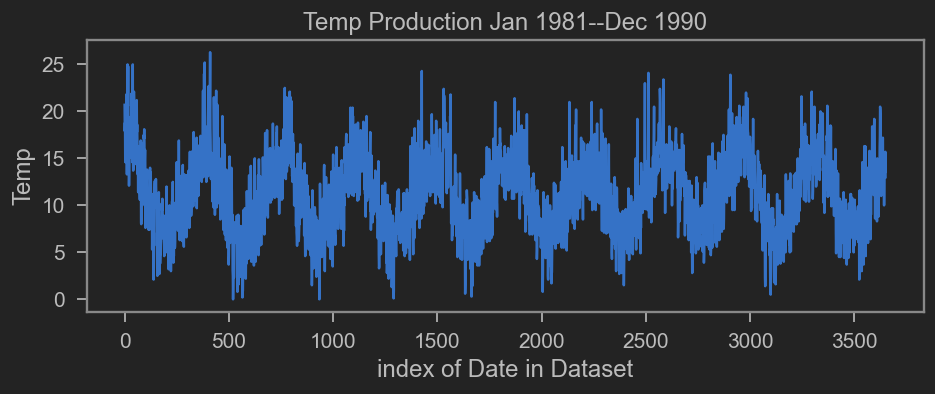

In [4]:
# plotting the points
plt.plot(data.values)
# naming the x axis
plt.xlabel('index of Date in Dataset')
# naming the y axis
plt.ylabel('Temp')
# giving a title to my graph
plt.title('Temp Production Jan 1981--Dec 1990')
# function to show the plot
plt.show()

In [51]:
#We then split the data into train (80%) and test set (20%).
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

In [40]:
from pmdarima.arima.utils import ndiffs
#choose the best test model based on min value
## Adf Test
print(ndiffs(data, test='adf'))  
# KPSS test
print(ndiffs(data, test='kpss'))  
# PP test:
print(ndiffs(data, test='pp'))  
#using different test to choose optimal solution 

0
0
0


so we are conclusion the type of test give same value

In [41]:
import pmdarima as pm
#create Auo ARIMA Model using pmdarima to get Best model
model = pm.auto_arima(train, start_p=1, start_q=1,  
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=False,   # No Seasonality
                      start_P=0, D=0, d=None,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)#The stepwise algorithm can be significantly faster than fitting all 
#The AIC (stimator of the relative quality of statistical model) value will allow us to compare how well a model fits the data 
print(model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14004.808, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22714.455, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14246.469, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19612.896, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=13588.505, Time=1.66 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14158.348, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=13548.961, Time=1.77 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=13961.999, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=13590.058, Time=2.42 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=13550.819, Time=2.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13538.735, Time=6.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13579.109, Time=3.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13801.630, Time=1.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13542.384, Time=8.06 sec
 ARIMA(2,0,0)(0,0,0

models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models.
The resulting best model parameters gave us an AIC value of 13538.735054299057 in 36.691 seconds

In [45]:
# Create  ARIMA Model
model = ARIMA(train, order=(3,0,1))
#fit model
model_ARIMA = model.fit(disp=0)
print(model_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 2920
Model:                     ARMA(3, 1)   Log Likelihood               -6763.368
Method:                       css-mle   S.D. of innovations              2.452
Date:                Tue, 14 Sep 2021   AIC                          13538.735
Time:                        00:21:48   BIC                          13574.611
Sample:                             0   HQIC                         13551.657
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.5121      0.942     12.224      0.000       9.666      13.358
ar.L1.value     1.4786      0.021     70.035      0.000       1.437       1.520
ar.L2.value    -0.6110      0.031    -19.647    

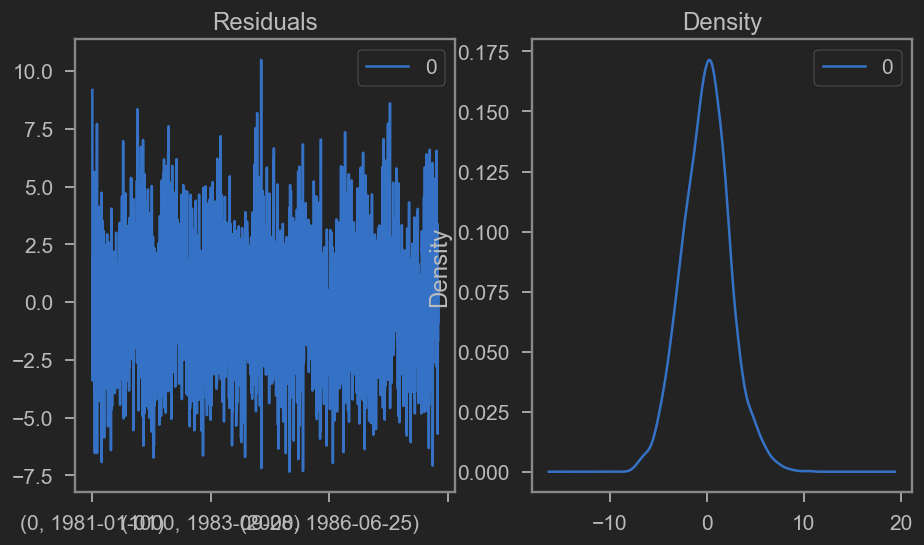

In [46]:
# Plot residual errors
residuals = pd.DataFrame(model_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
plt.xticks(rotation=90)
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<Figure size 1800x600 with 0 Axes>

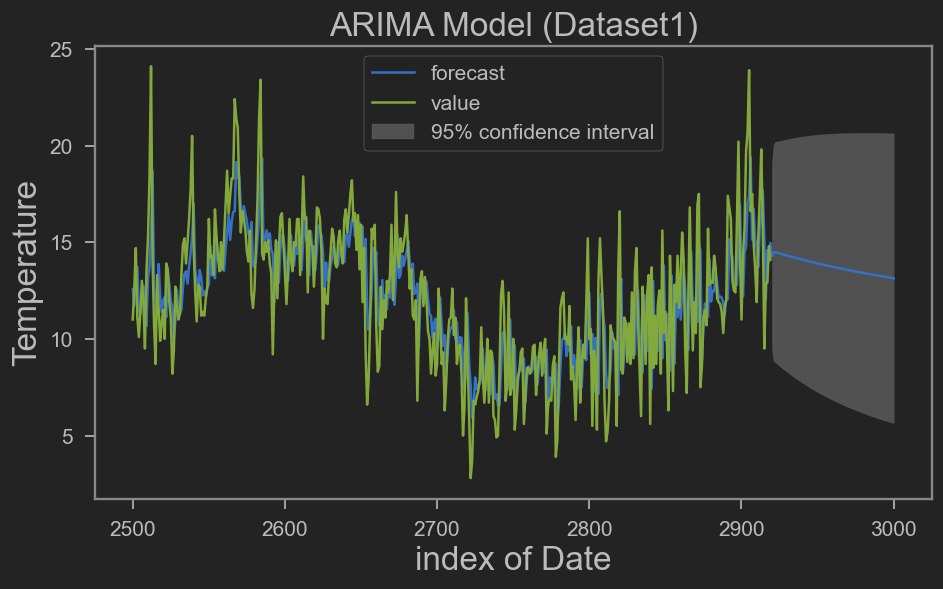

In [47]:
# Actual vs Fitted
plt.figure(figsize=(15,5))
model_ARIMA.plot_predict(start=2500,end=3000,dynamic=False,alpha=0.05)
plt.xlabel("index of Date" ,fontsize=20)
plt.ylabel("Temperature",fontsize=20)
plt.title("ARIMA Model (Dataset1)",fontsize=20)
plt.show()

In [48]:
predict=model_ARIMA.predict(start=len(train),end=len(data)-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [49]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predict))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 4.019
